# <center>Лабораторна робота №3. <br> Візуальний аналіз даних про публікації на сайті Хабрахабр</center>

**Заповніть код в клітинках**

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Завантаження і знайомство з даними

Для роботи вам знадобляться поепердньо оброблені дані з платформи kaggle (https://www.kaggle.com/c/howpop-habrahabr-favs).

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google colab, а не на PC, можна отримати шляхом монтування google drive

In [2]:
# шлях до папки з даними на моєму github, відредагуйте згідно вашого випадку
data_folder = "https://raw.githubusercontent.com/Kenobi-Knobs/DataScienceSSUCourse/master/Lab%202/data/" 

In [3]:
#df = pd.read_csv('data/howpop_train.csv')
df = pd.read_csv(data_folder+'/howpop_train.csv')

In [4]:
df.shape

(134137, 17)

In [5]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Позбавимося відразу від змінних, назви яких закінчуються на `_lognorm` (потрібні для змагань на Kaggle). Виберемо їх за допомогою `filter()` і видаимо `drop`-ом:

In [6]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столвбці 
        inplace = True) # позбавляє від необхідності зберігати датасет

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [8]:
df.describe(include = ['object', 'bool'] # бінарні і категоріальні змінні
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [9]:
# налаштування зовнішнього вигляду графіків в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Стовбець **`published`** (час публікації) містить рядки. Щоб ми мали змогу працювати з цими даними як з датою/часом публікації, приведемо їх до типу `datetime`:

In [10]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Створимо декілька стовбців на основі даних про час публікації:

In [11]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Відтепер Ваша черга. В кожному пункті пропонується побудувати картинку і з її допомогою відповісти на питання. Звичано, можна спробувати відповісти на всі питання лише використовуючи Pandas, без картинок, але ми радимо Вам потренуватися будувати (красиві) візуалізації.   

## 1\. В якому місяці (і якого року) було більше всього публікацій?

* березень 2016
* березень 2015 ✅
* квітень 2015
* квітень 2016

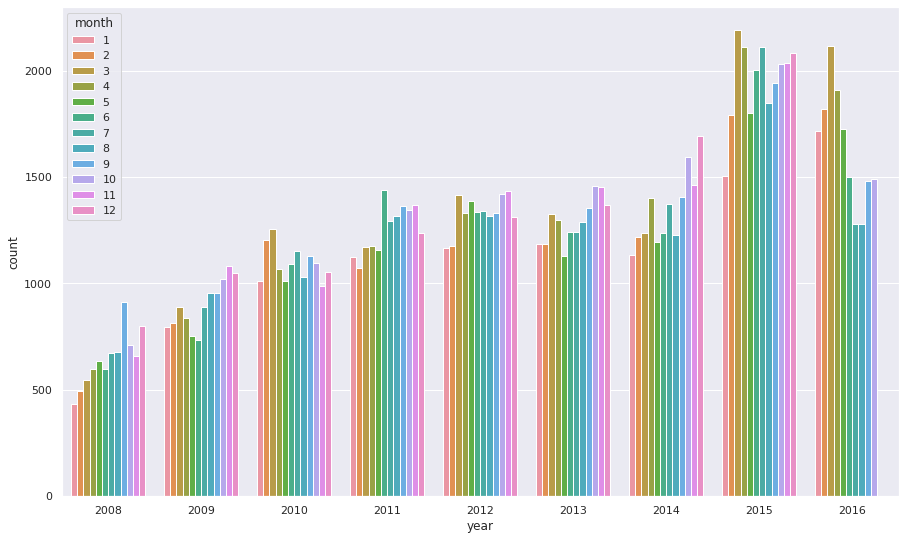

In [13]:
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='year', hue='month', data=df)

## 2\. Проаналізуйте публікації в месяці з попереднього питання

Виберіть один чи декілька варіантів:

* Один чи декілька днів сильно виділяються із загальної картини (субота має мало публікацій)
* На хабрі _завжди_ більше статей, ніж на гіктаймсі ✅
* По суботам на гіктаймс і на хабрахабр публікують приблизно одинакову кількість статей ✅

Підказки: побудуйте графік залежності числа публікацій від дня; використовуйте параметр `hue`; не переймайтесь сильно з відповідями і не шукайте прихованого змісту :)

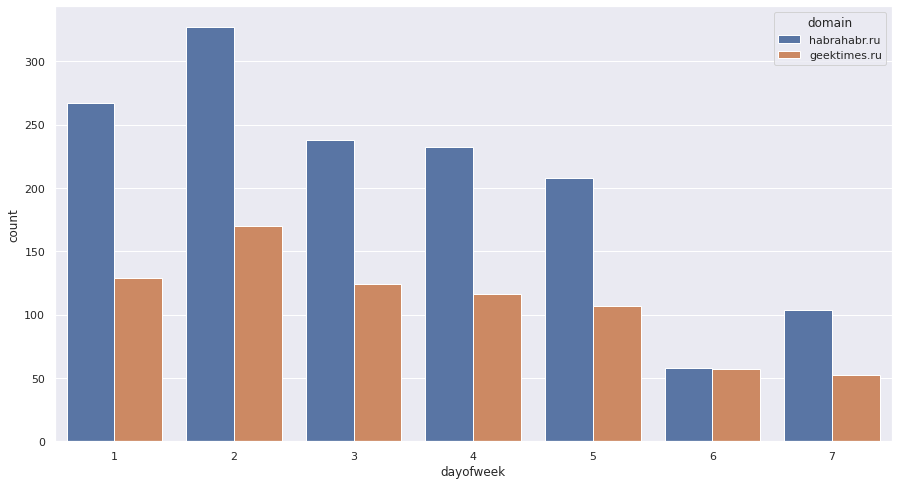

In [14]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x='dayofweek', hue='domain', data=df[(df['year'] == 2015) & (df['month'] == 3)])


## 3\. Коли найкраще всього опублікувати статтю?

* Більш всього переглядів набирають статті, опубліковані в 12 годин дня ❌
* В опублікованих о 10-й ранку постів більше всього коментарів ❌
* Більше всього переглядів набирають статтті, опубліковані в 6 годин ранку ✅
* Максимальне число коментарів на гіктаймсі набрала стаття, опублікована в 9 годин вечора ❌
* На хабрі денні статті комментують частіше, ніж вечірні ✅

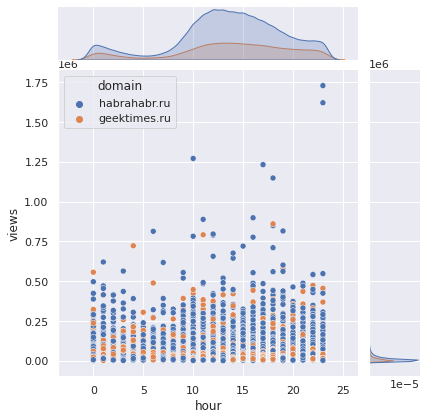

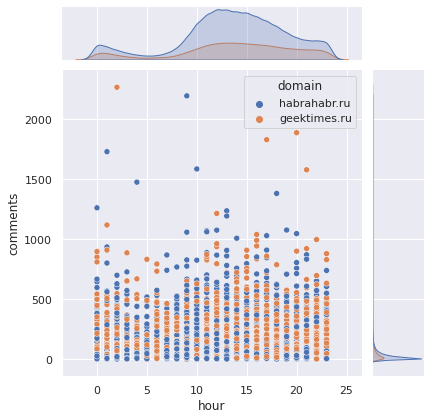

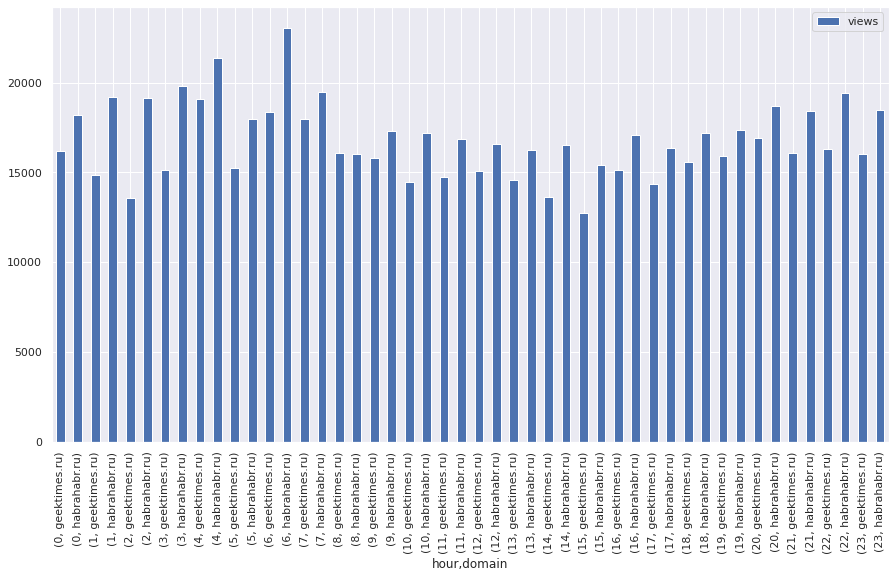

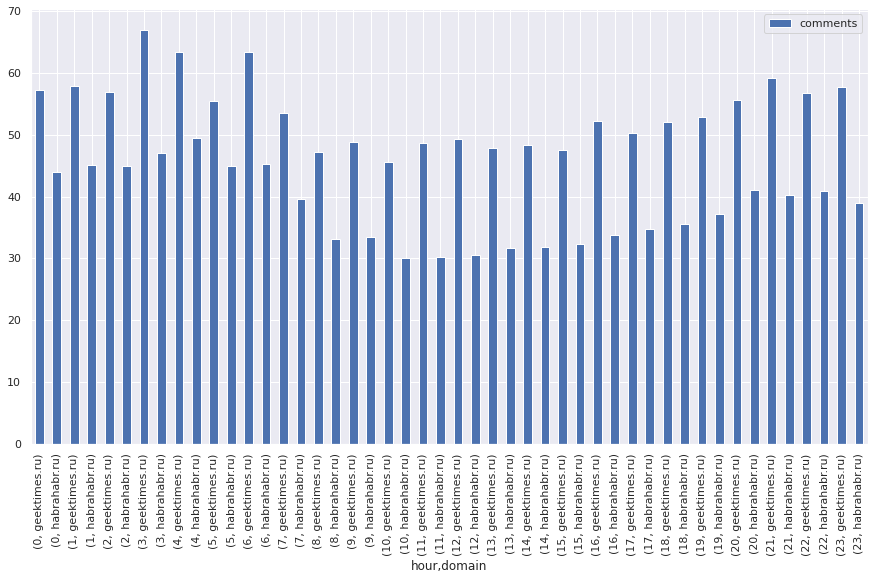

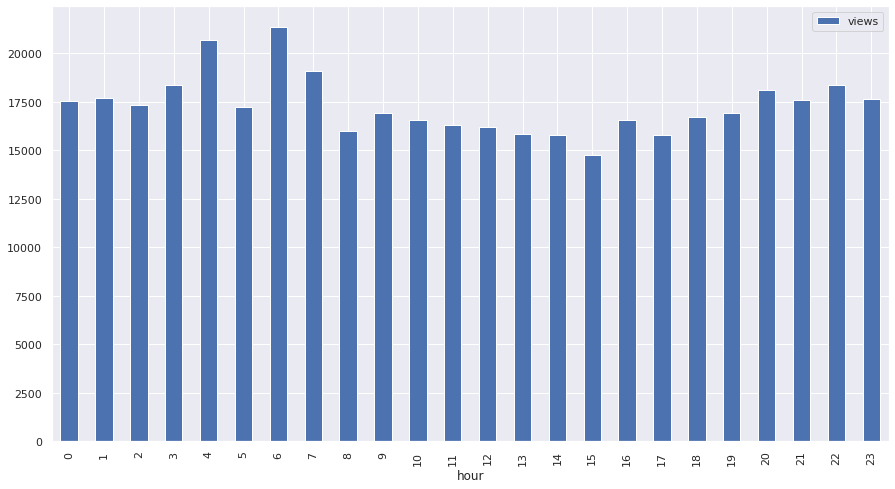

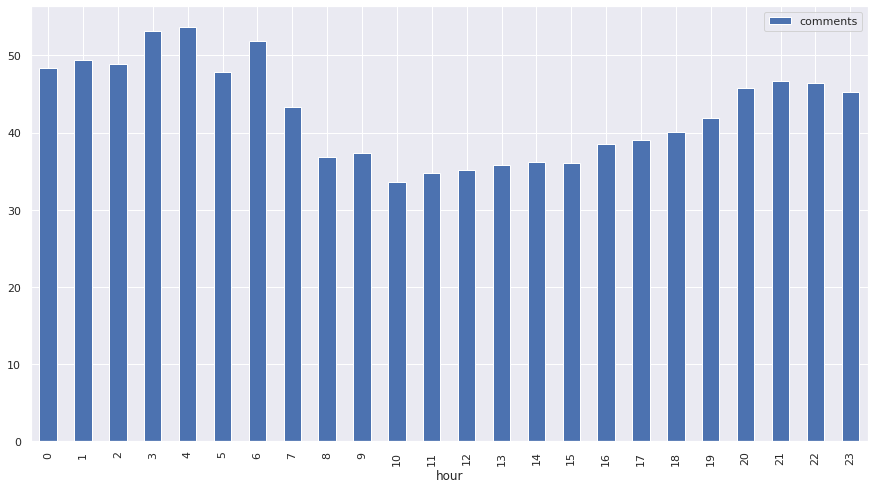

In [15]:
dfHours1 = df [['views'] + ['domain'] + ['hour']]
dfHours2=df[['comments'] + ['domain'] + ['hour']] 

sns.jointplot (x="hour", y="views", hue="domain", data=dfHours1) 
sns.jointplot (x="hour", y="comments", hue="domain", data=dfHours2)
df[[x for x in df.columns if ('views') in x] + ['domain'] +
  ['hour']].groupby(['hour', 'domain']).mean (). plot (kind='bar') 
df[[x for x in df.columns if ('comments') in x] + ['domain'] +
  ['hour']].groupby(['hour', 'domain']).mean ().plot (kind='bar')
df[[x for x in df.columns if ('views') in x] +
  ['hour']].groupby(['hour']).mean().plot (kind='bar')
df[[x for x in df.columns if ('comments') in x] +
  ['hour']].groupby(['hour']).mean().plot (kind='bar')

## 4\. Кого з топ-20 авторів частіше всього мінусують?

* @Mordatyj
* @Mithgol
* @alizar ✅
* @ilya42

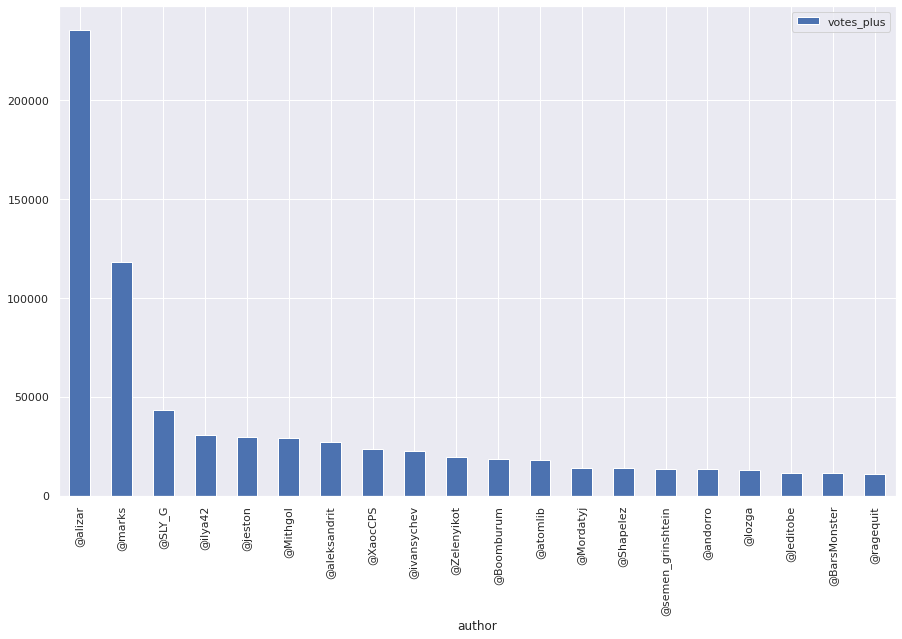

In [16]:
sns.set(rc={'figure.figsize': (15,9)})

df[[x for x in df.columns if ('votes_plus') in x] + [x for x in df.columns if ('votes minus') in x] +
   ['author']].groupby('author').sum().sort_values('votes_plus', ascending=False).head(20).plot(kind='bar');

## 5\. Порівняйте суботи і понеділки

Чи правда, що по суботам автори пишуть в основному вдень, а по понедількам — в основному вечером? ❌

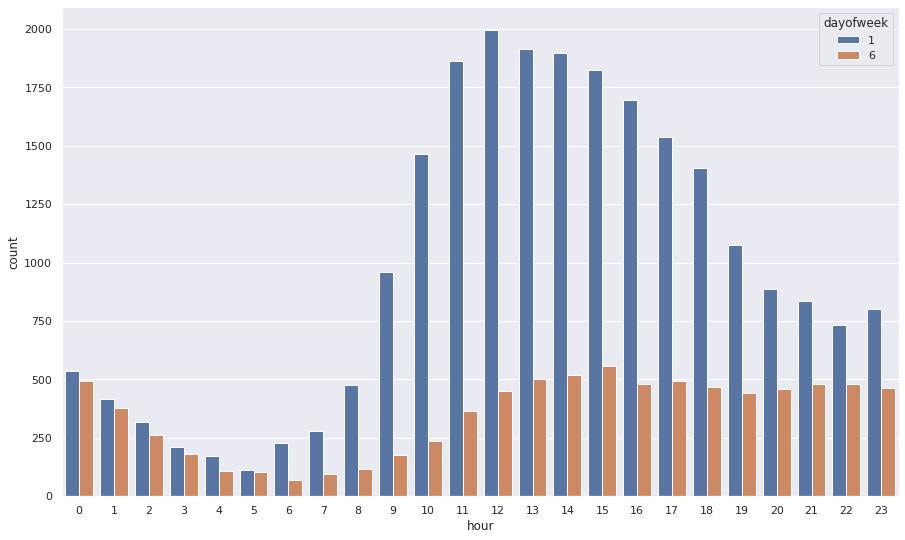

In [17]:
dfDays = df[(df["dayofweek"] == 1) | (df["dayofweek"] == 6)]
sns.countplot(x="hour", hue="dayofweek", data=dfDays)